## Pymaceuticals Analysis

This analysis summarizes the results of a study evaluating the impact of different drug regimens on the tumor volume of mice treated with anti-cancer medications. A total of 249 study mice with identified squamous cell carcinoma tumors received drug treatment, and tumor development was observed and measured over the course of 45 days. 

One study mouse was excluded from the analysis due to duplicate data points; 248 mice were included in the final analysis. 

Of the mice included in the analysis, 49.8% were female, and 50.2% were male. 

Each mouse received only one drug regimen. Nine drug regimens were evaluated, in addition to one placebo group: Ramicane, Capomulin, Infubinol, Ceftamin, Stelasyn, Zoniferol, Ketapril, Propriva, and Naftisol. 

Ramicane, Capomulin, Infubinol, and Ceftamin were the four non-placebo drug regimens that resulted in the lowest average tumor volume among treated mice. Among these treatment groups, mice treated with Ramicane demonstrated the lowest average final tumor volume, and the lowest variance in final tumor volume. 

Mouse weight and average observed tumor volume were strongly correlated, with a Pearson's correlation coefficient of 0.84.

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress
from sklearn import datasets

# Access data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read data files 
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Merge into a single DataFrame
df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Display the number of unique mouse IDs 
count_unique_id = len(df["Mouse ID"].unique())
count_unique_id

249

In [3]:
count_mouse_ids = len(df["Mouse ID"])
count_mouse_ids

1893

In [4]:
# Find and display mouse IDs with duplicate time points (source: https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/)
duplicate_id = df[df.duplicated()]
duplicate_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [5]:
# Clean the data to remove the mouse ID with duplicate timepoints (source: https://saturncloud.io/blog/python-pandas-conditionally-delete-rows/)
df = df.drop(df[df['Mouse ID'] == "g989"].index)

In [6]:
# Confirm duplicate data points have been removed
count_mouse_ids = len(df["Mouse ID"])
count_mouse_ids

1880

In [7]:
# Confirm the updated number of unique mouse IDs 
count_unique_id = len(df["Mouse ID"].unique())
count_unique_id

248

In [8]:
# Create a DataFrame of summary statistics
# Dataframe should have a row for each drug regimen, with names contained in the index column
# Dataframe should have a column for: mean, median, variance, st dev, SEM of tumor volume

#Create a list of unique drug regimens
drug_regimens = df["Drug Regimen"].unique()

mean_tumor_volume = []
median_tumor_volume = []
variance_tumor_volume = []
sd_tumor_volume = []
sem_tumor_volume = []
for drug in drug_regimens:
    tumor_volume = df.loc[df["Drug Regimen"] == drug, :]
    mean_tumor_volume.append(tumor_volume["Tumor Volume (mm3)"].mean())
    median_tumor_volume.append(tumor_volume["Tumor Volume (mm3)"].median())
    variance_tumor_volume.append(np.var(tumor_volume["Tumor Volume (mm3)"], ddof = 0))
    sd_tumor_volume.append(np.std(tumor_volume["Tumor Volume (mm3)"], ddof = 0))
    sem_tumor_volume.append(sem(tumor_volume["Tumor Volume (mm3)"]))
 
summary = zip(drug_regimens, mean_tumor_volume, median_tumor_volume, variance_tumor_volume, sd_tumor_volume, sem_tumor_volume)
summary_df = pd.DataFrame(summary)
summary_df.columns = ['Drug Regimens', 'Mean Tumor Volume', 'Median Tumor Volume', 'Variance in Tumor Volume', 'St Dev in Tumor Volume', 'Standard Error in Tumor Volume']
summary_df = summary_df.set_index("Drug Regimens")
summary_df

,Mean Tumor Volume,Median Tumor Volume,Variance in Tumor Volume,St Dev in Tumor Volume,Standard Error in Tumor Volume
Drug Regimens,,,,,
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111
Zoniferol,53.236507,51.818479,48.266689,6.947423,0.516398
Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
Propriva,52.320930,50.446266,43.555716,6.599675,0.544332


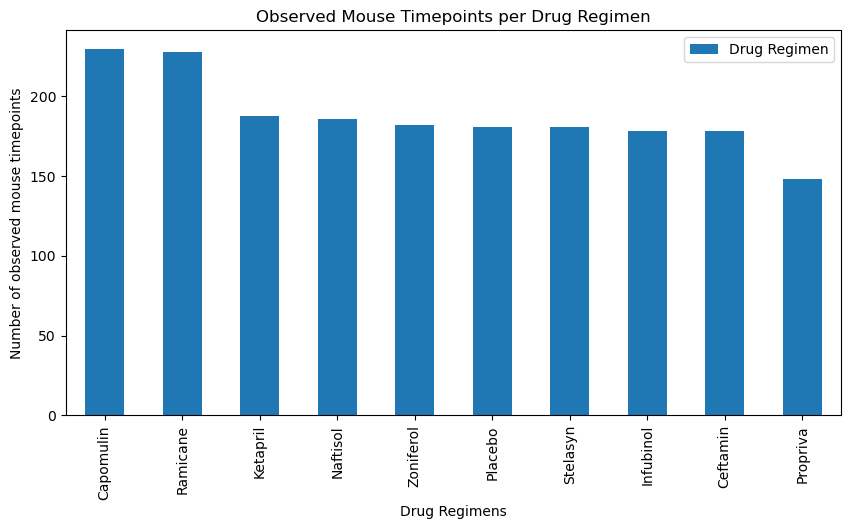

In [9]:
# Bar Chart 1: Total number of rows for each drug regimen in the study
# Create bar chart using Pandas Dataframe.plot() method

drug_regimen_counts = df["Drug Regimen"].value_counts()
drug_regimen_counts_df = pd.DataFrame(drug_regimen_counts)

drug_regimen_counts_df.plot(kind = "bar", figsize = (10,5), title = "Observed Mouse Timepoints per Drug Regimen", xlabel = "Drug Regimens", ylabel = "Number of observed mouse timepoints")
plt.show()

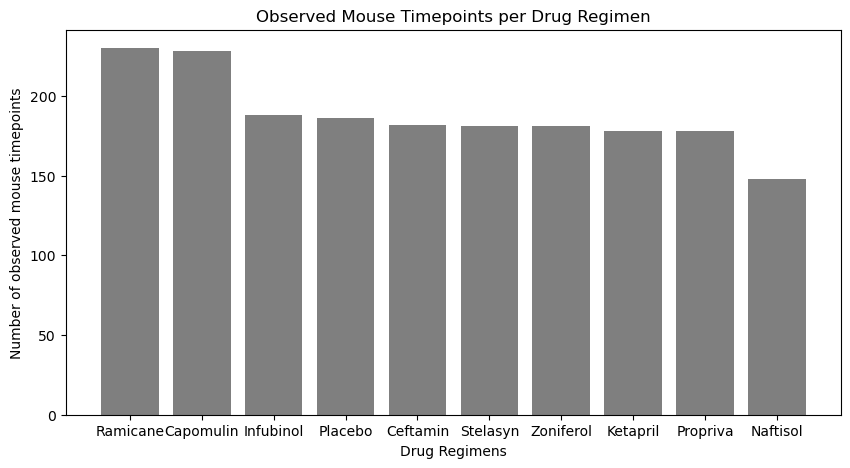

In [10]:
# Bar Chart 2: Total number of rows for each drug regimen in the study
# Create bar chart using Matplotlib's pyplot method

x_axis = drug_regimens
y_axis = drug_regimen_counts

plt.figure(figsize = (10,5))
plt.bar(x_axis, y_axis, alpha = 0.5, align = "center", color = "black")
plt.title("Observed Mouse Timepoints per Drug Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of observed mouse timepoints")
plt.show()

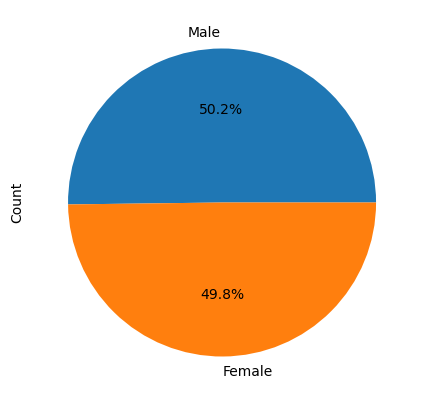

In [11]:
# Pie Chart 1: Distribution of female vs. male mice in study
# Create pie chart using Pandas DataFrame.plot() method

sex_df = df.drop_duplicates(["Mouse ID"])
sex_counts = sex_df["Sex"].value_counts()
sex_counts_dict = {
    'Sex': ['Male', 'Female'],
    'Count': [125,124]
}

sex_counts_df = pd.DataFrame(sex_counts_dict)

sex_counts_df["Count"].plot(kind = 'pie', labels = sex_counts_df["Sex"], autopct = '%1.1f%%', figsize = (10,5))
plt.show()

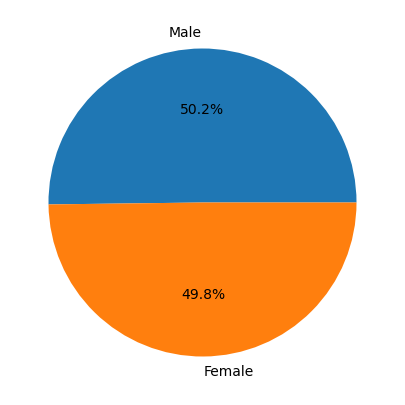

In [12]:
# Pie Chart 2: Distribution of female vs. male mice in study
# Create pie chart using Matplotlib pyplot method

labels = sex_counts_df["Sex"]
values = sex_counts_df["Count"]

plt.figure(figsize = (10,5))
plt.pie(values, labels = labels, autopct = '%1.1f%%')
plt.show()

In [13]:
# Create a grouped dataframe that shows the largest time point for each mouse
mouse_id_df = df.groupby(["Mouse ID"])
max_timepoint_df = mouse_id_df["Timepoint"].max()

In [14]:
# Merge this df with the original df to get the tumor volume to the last timepoint
merged_df = pd.merge(df, max_timepoint_df, on = ["Mouse ID", "Timepoint"], how = 'right')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1


In [15]:
# Create a list to hold drug regimen names and an empty list to hold the final tumor volume data
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume_list = []

In [16]:
# Loop through each drug in regimen list and append the final tumor volume for each drug to the empty list (source: https://www.geeksforgeeks.org/iterating-over-rows-and-columns-in-pandas-dataframe/)
for drug in treatments:
    final_tumor_volume = merged_df.loc[merged_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_volume_list.append(final_tumor_volume)
 # Determine outliers with upper and lower bounds, then print results   
    quartiles = final_tumor_volume.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles [ 0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
    print(f" The outliers for {drug} are {outliers}")

 The outliers for Capomulin are Series([], Name: Tumor Volume (mm3), dtype: float64)
 The outliers for Ramicane are Series([], Name: Tumor Volume (mm3), dtype: float64)
 The outliers for Infubinol are 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
 The outliers for Ceftamin are Series([], Name: Tumor Volume (mm3), dtype: float64)


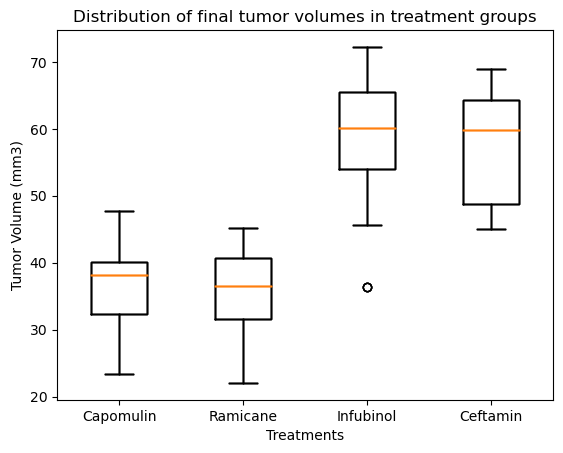

In [17]:
# Generate a boxplot that shows the distribution of final tumor volume for all mice in each treatment group
# Source for setting tick labels: https://www.tutorialspoint.com/matplotlib/matplotlib_setting_ticks_and_tick_labels.htm

fig1, ax1 = plt.subplots()
ax1.set_title('Distribution of final tumor volumes in treatment groups')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Treatments')

x = range(3)
for drug in treatments:
    ax1.boxplot(tumor_volume_list)

ax1.set_xticks([1,2,3,4])
ax1.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

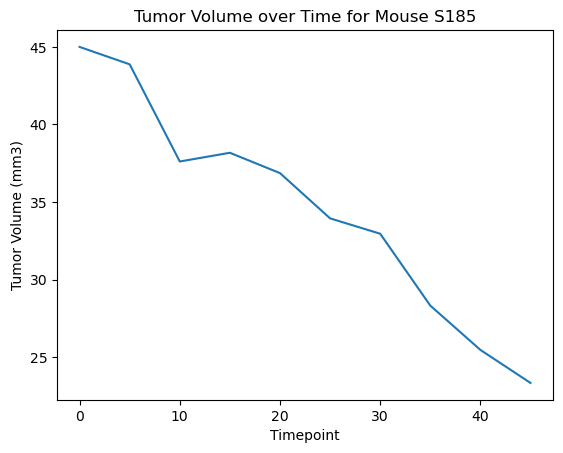

In [18]:
# Create database for a single mouse
mouse_df = df.loc[df["Mouse ID"] == "s185",:]

# Generate a line plot of tumor volume vs. time point for this single mouse
plt.plot(mouse_df["Timepoint"], mouse_df["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume over Time for Mouse S185")
plt.show()

In [19]:
# Create a dataframe for mouse weight and average tumor volume for mice in the Capomulin treatment group
capomulin_df = df.loc[df["Drug Regimen"] == "Capomulin"]
grouped_capomulin_df = capomulin_df.groupby("Mouse ID")
average_tumor_volume_df = grouped_capomulin_df["Tumor Volume (mm3)"].mean()
mouse_weight_df = grouped_capomulin_df["Weight (g)"].mean()

capomulin_df = pd.merge(average_tumor_volume_df, mouse_weight_df, on = "Mouse ID")

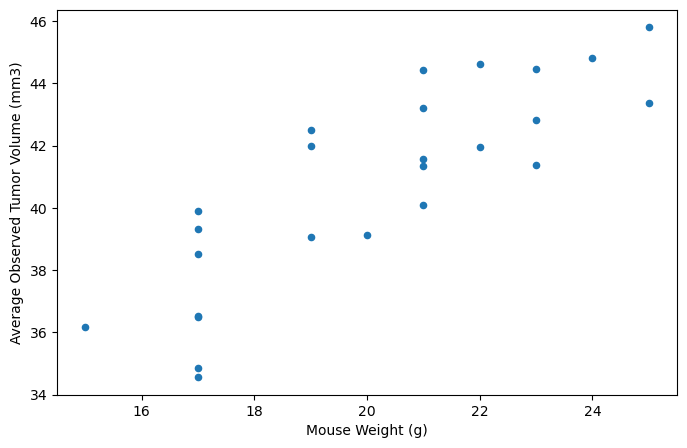

In [20]:
# Generate a scatter plot of mouse weight vs. average observed tumor volume for the entire Capomulin treatment regimen
capomulin_df.plot(kind = "scatter", x = "Weight (g)", y = "Tumor Volume (mm3)", figsize = (8,5), xlabel = "Mouse Weight (g)", ylabel = "Average Observed Tumor Volume (mm3)")
plt.show()

In [21]:
# Calculate the correlation coefficient between mouse weight and avg observed tumor volume
capomulin_tumor_volume = capomulin_df.iloc[:,0]
capomulin_mouse_weight = capomulin_df.iloc[:,1]
correlation = st.pearsonr(capomulin_tumor_volume, capomulin_mouse_weight)
correlation

PearsonRResult(statistic=0.8419363424694721, pvalue=1.3225722434712393e-07)

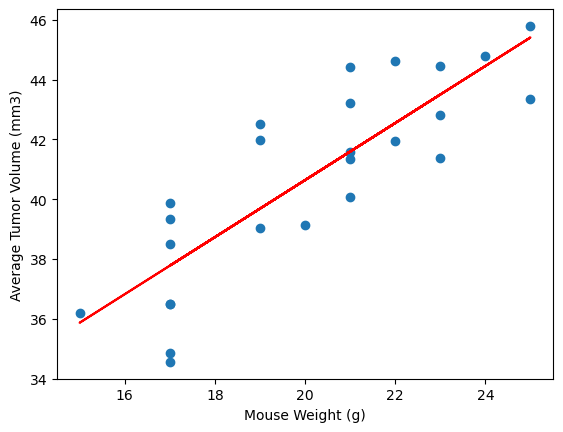

The correlation coefficient between mouse weight and average tumor volume is: 0.84


In [22]:
# Calculate the linear regression model between mouse weight and avg observed tumor volume
x_values = capomulin_df["Weight (g)"]
y_values = capomulin_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5,1), fontsize = 15, color = "red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
print(f"The correlation coefficient between mouse weight and average tumor volume is: {round(correlation[0],2)}")